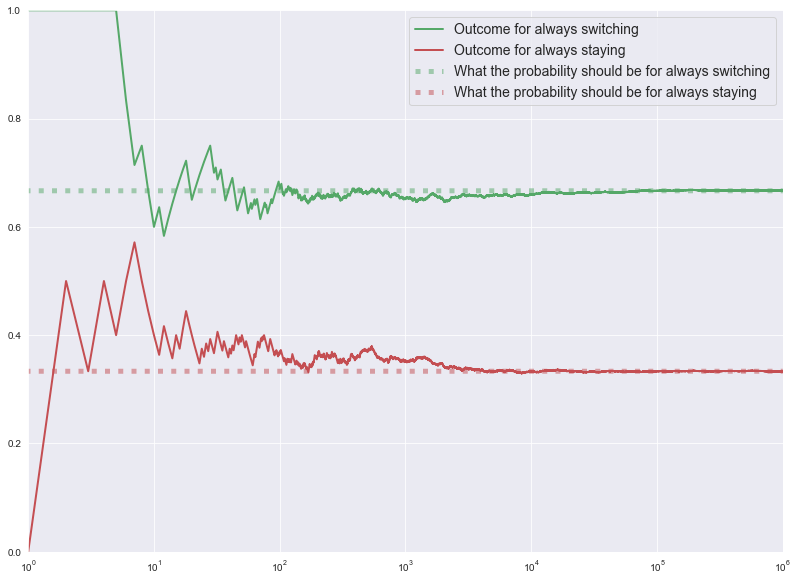

In [1]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Class 'Chooser' to represent initial selector trying to win $100
class Chooser:

    def __init__(self, switch=False):
        self.switch = switch
        self.selection = None

    def select_box(self, box_count):
        self.selection = int(random.uniform(0, box_count))
        return self.selection

    def wanna_switch(self, new_box):
        if self.switch:
            return new_box
        else:
            return self.selection
        

#Class 'friend' who knows which box contains the $100 and reveals one box containing $10
class Friend:

    def __init__(self, box_count=3):
        assert box_count >= 3
        self._benjamin_index = int(random.uniform(0, box_count))
        self.box_count = box_count

    def present_boxes(self):
        return self.box_count

    def eliminate_others_and_present_one_box(self, chooser_selection):
        if chooser_selection == self._benjamin_index:
            while True:
                alternative_box = int(random.uniform(0, self.box_count))
                if alternative_box != chooser_selection:
                    return alternative_box
        else:
            return self._benjamin_index

    def reveal_if_winner(self,final_selection):
        if final_selection == self._benjamin_index:
            return True
        else:
            return False

        
#Run simulation 1 million times to satisfy Law of Large Numbers        
          
N_GAMES = 1000000
N_BOXES = 3

sns.set_style('darkgrid')
colors = sns.color_palette('deep')

#Defining choosing the box with $100 as a win

def single_round(friend, chooser):
    total_boxes = friend.present_boxes()
    first_choice = chooser.select_box(total_boxes)
    remaining_box = friend.eliminate_others_and_present_one_box(first_choice)
    final_choice = chooser.wanna_switch(remaining_box)
    won = friend.reveal_if_winner(final_choice)
    return won

#Setting up the graph

def plot_two_lists(list1, list2, p1=2/3):
    l = np.ones(N_GAMES + 1)
    p2 = 1 - p1
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(list1, color=colors[2], linewidth=2)
    ax.plot(list2, color=colors[3], linewidth=2)
    ax.plot(l * p1, color=colors[2], linestyle='dotted', linewidth=5, alpha=0.5)
    ax.plot(l * p2, color=colors[3], linestyle='dotted', linewidth=5, alpha=0.5)
    plt.legend(['Outcome for always switching',
                'Outcome for always staying',
                'What the probability should be for always switching',
                'What the probability should be for always staying'
                ], fontsize=14)
    ax.set_xscale('log')
    plt.ylim([0, 1])
    plt.xlim([1, N_GAMES])
    fig.set_size_inches(12, 9)
    plt.tight_layout(pad=4.0)
    plt.savefig("convergence_plot.png", dpi=400)
    plt.show()

#Running two choosers, one that always switches and one that always stays and recording the outcome

if __name__ == '__main__':

    friend = Friend(box_count=N_BOXES)
    chooser_1 = Chooser(switch=True)
    chooser_2 = Chooser(switch=False)

    c1_times_won = 0
    c2_times_won = 0
    c1_percentage = np.zeros(N_GAMES + 1)
    c2_percentage = np.zeros(N_GAMES + 1)

    for k in range(1, N_GAMES + 1):
        c1_won = single_round(friend, chooser_1)
        c2_won = single_round(friend, chooser_2)

        if c1_won:
            c1_times_won += 1
        if c2_won:
            c2_times_won += 1

        c1_percentage[k] = c1_times_won / k
        c2_percentage[k] = c2_times_won / k

 #After running this simulation, I have learned it is better to switch. There is a 66% chance of getting the $100 dollars 

    plot_two_lists(c1_percentage, c2_percentage)

In [2]:
from random import seed
from random import random
import numpy as np

def monte_carlo_uniform(func, a=0, b=1, n=1000):
  """
  Monte carlo integration with more uniform spread (forced)
  """
  subsets = np.arange(0, n+1, n/10)
  u =np.zeros(n)
  for i in range(10):
    start = int(subsets[i])
    end = int(subsets[i+1])
    u[start:end] = np.random.uniform(low=i/10, high=(i+1)/10, size=end-start)

  np.random.shuffle(u)
  u_func = func(a+(b-a)*u)
  s=((b-a)/n)*u_func.sum()

  return s

In [3]:
def f1(x):
  return (x * np.cos(71*x) + np.sin(13*x))

In [4]:
inte = monte_carlo_uniform(f1, a=0, b=4, n=100)
print(inte)

-0.7545286145881057


In [5]:
# using scipy.integrate.quad() method
from scipy import integrate
results,err = integrate.quad(f1, 0, 4)
  
print(results)
print(err)

0.1429048207625332
1.5600408580134203e-13


In [6]:
%%timeit -n100 -r100
inte=monte_carlo_uniform(f1, a=0, b=4, n=500)

91 µs ± 10.5 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


In [7]:
%%timeit -n100 -r100
integrate.quad(f1,a=0,b=4)

2.33 ms ± 195 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


[0.06876015780775419, -0.3120149299878302, 0.41199019198151754, 0.39429726004933713, 0.5327810657519791, 0.062219772480509764, 0.009164963434414197, 0.10729027658847556, 0.438216297512414, -0.08433570147802091, 0.275484109790512, 0.196255179279135, 0.1691007387664253, -0.012299929856036805, 0.671299277675911, 0.6292145996584549, 0.12812387373253506, 0.1762874838212924, -0.06487153437255064, 0.17212297318302464, -0.18567107958713394, 0.26551697444574823, 0.14384029020545824, 0.35233314870078997, 0.3598659314247941, 0.32790969129448233, 0.37296589708016875, 0.14457226961251474, 0.6353116262066989, 0.24680386044203007, 0.17274487006362418, -0.23985175381561827, -0.07479493232326809, 0.3149695552859014, -0.27066473549338976, -0.44763673315837726, 0.040086800725578395, 0.2343913581518421, 0.3464644669459133, 0.26295775862343196, 0.053121031397940804, -0.2950750870848805, 0.2100053887781575, -0.09190066504701525, 0.4378983644377606, -0.3043555085309276, 0.21764759289283736, -0.18350062726048

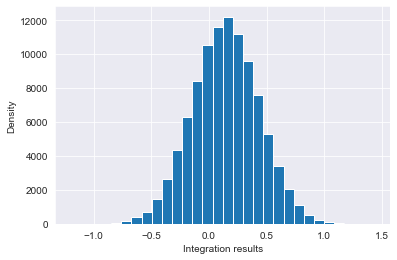

In [8]:
import matplotlib.pyplot as plt
MC_samples=[]
for i in range(100000):
  Y=monte_carlo_uniform(f1, a=0, b=4, n=600)
  MC_samples.append(Y)

print(MC_samples)

plt.hist(MC_samples, bins=30)  # density=False would make counts
plt.ylabel('Density')
plt.xlabel('Integration results');